# User Guide  for MTPy Installation into Ubuntu Linux 

## MTPy Workshop - Adelaide

### October 2018

## Introduction

MTPy software requires a Python Interpreter with a dependency packages installed.

We recommend to use Anaconda Python distribution (https://www.anaconda.com/what-is-anaconda/), as it can be easily installed without administration or root privilege.  In addition, Ananconda provides and maintains a comprehensive repository of python libraries and packages for scientific computing.

In this guide we provide instructions on how to install anaconda python into a Linux desktop.
It is tested on Ubuntu Linux Version-18.04, and should be similar for other flavours of Linux systems.


- You can get access to Linux Virtual Machines (VM) in many ways, including using public cloud service providers such as AWS and Google. 

- Perhaps the most convenient and no-cost way to get Linux systems is to use Oracle VirtualBox: https://www.oracle.com/technetwork/server-storage/virtualbox/downloads/index.html, which allows PC/Laptop users to create virtual guest OS such as Ubuntu.


- In this workshop, we plan to provide an Oracle Virtual Appliance (Ubuntu1804-mtpy.ova), which can be directly imported into user's Oracle VirtualBox. This way a user will be able to run the Workshop material without installing anything else.

## How to install Anaconda Python on Linux System

### 1) obtain the installation package by download 

from https://www.anaconda.com/download/#linux  

OR using the wget command

mtpy@mtpy-VirtualBox$  wget https://repo.anaconda.com/archive/Anaconda2-5.2.0-Linux-x86_64.sh


Saving to: 'Anaconda2-5.2.0-Linux-x86_64.sh’

Anaconda2-5.2.0-Linux-x86_64.sh 100%[=============================================>] 603.38M   209KB/s    in 53m 32s 


### 2) Change the file permission to executable:

mtpy@mtpy-VirtualBox$  chmod 755 Anaconda2-5.2.0-Linux-x86_64.sh


### 3) installation on commandline


mtpy@mtpy-VirtualBox$ ./Anaconda2-5.2.0-Linux-x86_64.sh 

Welcome to Anaconda2 5.2.0

In order to continue the installation process, please review the license
agreement.
Please, press ENTER to continue
> 

Accept the license and let it install into default directory location (/home/mtpy/anaconda2). This process will take a couple of minutes to complete. In the end when prompted, enter yes to make the new ananconda python PATH available by appending automatically a line of configuration into your $HOME/.bashrc, with output shown below:

[no] > yes

Appending source /home/mtpy/anaconda2/bin/activate to /home/mtpy/.bashrc
A backup will be made to: /home/mtpy/.bashrc-anaconda2.bak


For this change to become active, you have to open a new terminal.

Thank you for installing Anaconda2!

........ Skip Visual Studio Code

Do you wish to proceed with the installation of Microsoft VSCode? [yes|no]
> no


### 4) Post-installation testing

After the successful installation of anaconda python, open a new terminal and test to make sure your default python interpreter is /home/mtpy/anaconda2/bin/python, instead of your OS-provided python (/user/bin/python):

mtpy@mtpy-VirtualBox:~$ which python

/home/mtpy/anaconda2/bin/python

mtpy@mtpy-VirtualBox:~$ python -V

Python 2.7.15 :: Anaconda, Inc.


### 5) Install additional dependency python packages:
    

install geopandas and netcdf4 for data handling:

    conda install geopandas -y

    conda install netcdf4 -y

The conda install will resolve all dependency packages such as gdal, pandas, etc

Configure GDAL_DATA properly by appending in $HOME/.bashrc 

export GDAL_DATA=/home/mtpy/anaconda2/share/gdal

(one way to do this is: echo 'export GDAL_DATA=/home/mtpy/anaconda2/share/gdal' >> /home/mtpy/.bashrc)

- If anything still not working, try to update the package by re-installation. 
- For example, if sypder does not run, try 

conda install spyder


### 6) Clone mtpy repository  using git


Obtain the mtpy source code:
    
git clone https://github.com/MTgeophysics/mtpy


- If git command is not installed, do 

sudo apt install git

# Testing MTPy environment in jupyter-notebook

In [1]:
# what python you are using?
!which python

/home/mtpy/anaconda2/bin/python


In [2]:
# If you cannot impport mtpy modules below, you need to set PYTHONPATH:
# here is a quick fix
import sys
sys.path.insert(0,'/home/mtpy/mtpy')

In [3]:
PATH2_SYNTH_EDI='/home/mtpy/mtpy/examples/data/edi_files_2/Synth00.edi'
SAVE_PATH='/home/mtpy/output_dir/'

import os
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

In [4]:
# import required modules
from mtpy.core.mt import MT

# Define the path to your edi file
edi_file = PATH2_SYNTH_EDI

# Create an MT object
mt_obj = MT(edi_file)

('epsg_code_val', [])


In [5]:
# To see the latitude and longitude
print (mt_obj.lat, mt_obj.lon)

(-19.01, 136.01)


In [6]:
# for example, to see the frequency values represented in the impedance tensor:
print mt_obj.Z.freq

[1.256500e+04 9.751601e+03 7.876300e+03 6.188500e+03 5.250801e+03
 4.265799e+03 3.515799e+03 8.437800e+02 6.562798e+02 4.922399e+02
 3.867599e+02 3.164400e+02 2.578400e+02 2.109600e+02 1.728900e+02
 1.367200e+02 1.015600e+02 7.421900e+01 5.761700e+01 4.882800e+01
 4.101600e+01 3.222700e+01 2.636700e+01 2.148400e+01 1.757800e+01
 1.440400e+01 1.147500e+01 8.593800e+00 6.591801e+00 5.371100e+00
 4.394500e+00 3.601100e+00 2.868700e+00 2.304700e+00 1.914100e+00
 1.601600e+00 1.328100e+00 1.074200e+00 8.789100e-01 6.835900e-01
 5.078100e-01 3.710900e-01 2.880900e-01 2.050800e-01 1.318400e-01
 8.789098e-02 6.835900e-02 5.127000e-02 4.028299e-02 3.295900e-02
 2.685500e-02 2.197300e-02 1.709000e-02 1.281700e-02 1.007100e-02
 8.239700e-03 6.713900e-03 5.493201e-03 4.272499e-03 2.822900e-03
 2.059900e-03 1.678500e-03 1.373300e-03 1.068100e-03 7.629400e-04]


In [7]:
# import required modules

# Define the path to your edi file and save path
edi_file = PATH2_SYNTH_EDI
savepath = SAVE_PATH

# Create an MT() object
mt_obj = MT(edi_file)

# To plot the edi file we read in in Part 1 & save to file:
pt_obj = mt_obj.plot_mt_response(plot_num=2)


pt_obj.save_plot(os.path.join(savepath,"Synth002.png"), fig_dpi=400)


<Figure size 960x720 with 7 Axes>

Saved figure to: /home/mtpy/output_dir/Synth002.png


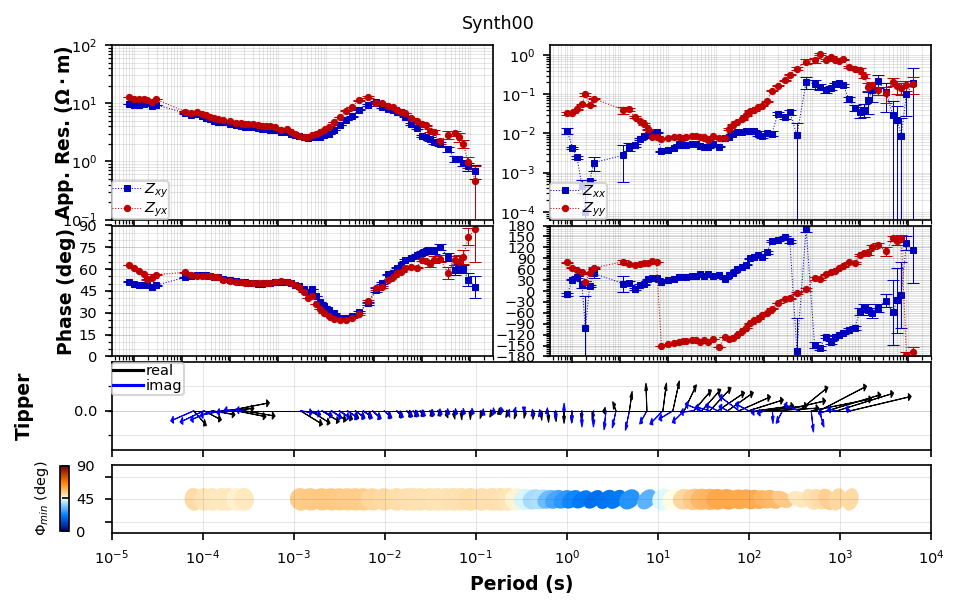

In [8]:
pt_obj.plot()